# Importing the Data

In [19]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# import datetime
import datetime

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', 100)

In [3]:
# load the csvs - it is available open source and online
iaps = pd.read_csv('iaps.csv')
sessions = pd.read_csv('sessions.csv')
spendevents = pd.read_csv('spendevents.csv')
users = pd.read_csv('users.csv')

In [4]:
print(len(iaps))
print(len(sessions))
print(len(spendevents))
print(len(users))

6685
722955
107764
22576


# Exploratory Analysis

## IAPS Analysis

In [15]:
# display data
iaps

,user_id,ts,date,prod_name,prod_type,rev
0,7480,2019-03-04 08:15:49,2019-03-04,iap_1_gems_2,gems,760
1,7480,2019-03-04 08:24:15,2019-03-04,iap_1_passes_2,chapterPasses,760
2,7480,2019-03-04 22:49:08,2019-03-04,iap_1_gems_1,gems,410
3,2466,2019-03-06 00:16:48,2019-03-06,iap_1_gems_2,gems,760
4,22001,2019-03-06 09:13:45,2019-03-06,iap_1_gems_2,gems,760
...,...,...,...,...,...,...
6680,18174,2019-04-21 18:50:42,2019-04-21,iap_1_passes_10,chapterPasses,3555
6681,18174,2019-04-21 18:51:29,2019-04-21,iap_1_passes_1,chapterPasses,410
6682,18174,2019-04-21 20:08:06,2019-04-21,iap_1_passes_10,chapterPasses,3555
6683,18174,2019-04-22 17:07:19,2019-04-22,iap_1_passes_2,chapterPasses,760


In [14]:
iaps.dtypes

user_id       int64
ts           object
date         object
prod_name    object
prod_type    object
rev           int64
dtype: object

#### Analysis of how much each product costs

In [26]:
# These are all the packages the users can buy
iaps['prod_name'].value_counts()

iap_1_gems_2          2599
iap_1_passes_2        1064
iap_1_gems_5           976
iap_1_gems_1           693
iap_1_passes_1         576
iap_1_gems_10          231
iap_1_passes_5         226
iap_1_passes_10        163
iap_1_gems_20           69
iap_value_pack_004      46
iap_value_pack_008      13
iap_value_pack_001      12
iap_value_pack_005       5
iap_1_gems_50            3
iap_value_pack_010       3
iap_1_gems_100           2
iap_value_pack_003       2
iap_value_pack_009       1
iap_value_pack_007       1
Name: prod_name, dtype: int64

In [7]:
# These are the amount of gems that the user bought. These should correspond to the prod_name packages
iaps['rev'].value_counts()

760      3663
410      1281
1810     1207
3560      234
3555      163
7060       69
1460       46
2860       13
17560       3
35060       2
1110        2
2510        1
3210        1
Name: rev, dtype: int64

In [10]:
iaps['rev'][2]

410

In [13]:
prod_list = {}

for i, val in enumerate(iaps['prod_name']):
    if val not in prod_list:
        prod_list[val] = iaps['rev'][i]
        # print(val, iaps['rev'][i])

prod_list

{'iap_1_gems_2': 760,
 'iap_1_passes_2': 760,
 'iap_1_gems_1': 410,
 'iap_1_passes_1': 410,
 'iap_1_gems_5': 1810,
 'iap_1_passes_5': 1810,
 'iap_1_gems_10': 3560,
 'iap_1_passes_10': 3555,
 'iap_1_gems_20': 7060,
 'iap_value_pack_004': 1460,
 'iap_value_pack_008': 2860,
 'iap_1_gems_50': 17560,
 'iap_value_pack_001': 410,
 'iap_value_pack_005': 1810,
 'iap_value_pack_003': 1110,
 'iap_value_pack_010': 3560,
 'iap_1_gems_100': 35060,
 'iap_value_pack_007': 2510,
 'iap_value_pack_009': 3210}

#### Date Analysis

In [16]:
# Purchase data seems to be from March to May in 2019
iaps.sort_values(by=['ts'])

,user_id,ts,date,prod_name,prod_type,rev
3460,19248,2019-03-01 00:24:52,2019-03-01,iap_1_gems_2,gems,760
3461,19248,2019-03-01 00:36:14,2019-03-01,iap_1_gems_2,gems,760
3442,12752,2019-03-01 01:18:04,2019-03-01,iap_1_passes_1,chapterPasses,410
2074,10387,2019-03-01 01:19:41,2019-03-01,iap_1_gems_2,gems,760
5431,13356,2019-03-01 03:35:04,2019-03-01,iap_1_passes_2,chapterPasses,760
...,...,...,...,...,...,...
2963,20401,2019-05-05 17:26:24,2019-05-05,iap_1_passes_2,chapterPasses,760
3604,15446,2019-05-05 18:04:08,2019-05-05,iap_value_pack_010,valuePack,3560
5430,15443,2019-05-05 20:40:23,2019-05-05,iap_1_passes_10,chapterPasses,3555
3605,15446,2019-05-05 22:12:51,2019-05-05,iap_1_gems_2,gems,760


In [20]:
# There seems to be less data as time goes on
iaps['date'].value_counts()

2019-03-06    873
2019-03-07    766
2019-03-05    653
2019-03-08    451
2019-03-04    433
2019-03-03    356
2019-03-02    333
2019-03-09    260
2019-03-01    188
2019-03-10    173
2019-03-11    155
2019-03-12    131
2019-03-13    131
2019-03-19    113
2019-03-20     91
2019-03-14     83
2019-03-18     64
2019-03-27     63
2019-03-16     59
2019-04-02     56
2019-03-15     52
2019-04-03     50
2019-03-29     49
2019-03-26     49
2019-03-25     48
2019-03-21     44
2019-04-09     44
2019-03-28     43
2019-03-17     43
2019-03-31     42
2019-03-24     42
2019-04-16     42
2019-03-22     39
2019-04-04     38
2019-04-01     37
2019-04-22     34
2019-04-17     32
2019-04-06     30
2019-04-21     30
2019-04-14     30
2019-03-23     30
2019-04-05     29
2019-04-13     27
2019-04-12     26
2019-04-15     26
2019-03-30     23
2019-04-08     23
2019-04-10     21
2019-04-11     21
2019-04-07     21
2019-04-30     20
2019-04-23     19
2019-04-27     19
2019-04-24     17
2019-04-20     17
2019-04-28

## Spendevents Exploratory Analysis

In [32]:
# display data
spendevents

,user_id,ts,date,story,chapter,spendtype,currency,amount
0,9829,2019-03-01 03:03:04,2019-03-01,story_1,0,earnGemsCounter,gems,-22
1,13757,2019-03-01 03:35:53,2019-03-01,story_1,0,earnGemsCounter,gems,-22
2,13757,2019-03-01 03:52:10,2019-03-01,story_2,0,earnGemsCounter,gems,-22
3,10009,2019-03-01 04:10:00,2019-03-01,story_1,0,earnGemsCounter,gems,-22
4,10009,2019-03-01 04:26:46,2019-03-01,story_2,0,earnGemsCounter,gems,-22
...,...,...,...,...,...,...,...,...
107759,15156,2019-04-23 02:31:46,2019-04-23,story_3,0,earnGemsCounter,gems,0
107760,15156,2019-04-23 02:31:59,2019-04-23,story_3,0,earnGemsCounter,gems,0
107761,15156,2019-04-23 02:32:04,2019-04-23,story_3,0,earnGemsCounter,gems,0
107762,15156,2019-04-23 02:32:11,2019-04-23,story_3,0,earnGemsCounter,gems,0


In [37]:
# filter to user id == 2062 due to assignment instructions
filtered_spendevents = spendevents['user_id'] == 2062

# order by ts so we can see all three spendtypes (according to assignment instructions)
spendevents[filtered_spendevents].sort_values(by=['ts'])

,user_id,ts,date,story,chapter,spendtype,currency,amount
15694,2062,2019-03-02 20:01:22,2019-03-03,story_1,0,earnGemsCounter,gems,-22
15721,2062,2019-03-03 03:50:45,2019-03-03,story_1,5,IAP,gems,-73
15722,2062,2019-03-03 03:50:58,2019-03-03,story_1,5,IAP,gems,-73
15723,2062,2019-03-03 03:51:00,2019-03-03,story_1,5,premiumChoice,gems,64
15724,2062,2019-03-03 04:07:34,2019-03-03,story_1,6,IAP,gems,-73
15725,2062,2019-03-03 04:07:37,2019-03-03,story_1,6,premiumChoice,gems,55
15726,2062,2019-03-03 04:24:58,2019-03-03,story_1,8,premiumChoice,gems,27


In [39]:
# the only currency is gems. This column is irrelevant
spendevents['currency'].value_counts()

gems    107764
Name: currency, dtype: int64

In [23]:
# shows that there is a 4th option for spendtype that wasn't discussed in the assignment (valuepack)
spendevents['spendtype'].value_counts()

earnGemsCounter    87235
premiumChoice      14231
IAP                 4915
valuepack             39
Name: spendtype, dtype: int64

In [41]:
# filter to spendtype == valuepack
filtered_spendtype = spendevents['spendtype'] == 'valuepack'

# we can see that value pack is another pack where the user spends money to buy gems
spendevents[filtered_spendtype].head()

,user_id,ts,date,story,chapter,spendtype,currency,amount
27107,9984,2019-04-15 20:16:49,2019-04-16,story_15,10,valuepack,gems,-322
32772,5782,2019-04-17 05:33:26,2019-04-17,story_1,4,valuepack,gems,-82
52405,5987,2019-04-17 05:02:48,2019-04-17,story_4,24,valuepack,gems,-217
52406,5987,2019-04-17 05:02:48,2019-04-17,story_4,24,valuepack,gems,-217
57519,8874,2019-04-17 07:46:03,2019-04-17,story_2,0,valuepack,gems,-217


## Sessions Exploratory Analysis

Preliminary analysis should be to find the average time it takes a user (that eventually pays for gems)
We can look at the ts for sessions and spendevents dataframe to figure this out 

In [44]:
# shows some users played a lot of sessions
sessions.sort_values(by=["session_num"])

,user_id,ts,date,session_num,last_session_termination_type
0,14067,2019-03-01 00:06:50,2019-03-01,1,NaN
325489,5532,2019-03-05 11:51:31,2019-03-05,1,NaN
325497,2505,2019-03-05 12:41:40,2019-03-05,1,NaN
325510,18717,2019-03-05 13:57:08,2019-03-05,1,NaN
325511,10274,2019-03-05 14:06:29,2019-03-05,1,NaN
...,...,...,...,...,...
721443,599,2019-05-05 21:45:33,2019-05-05,1915,NaN
721444,599,2019-05-05 21:46:03,2019-05-05,1916,NaN
721445,599,2019-05-05 21:48:38,2019-05-05,1917,NaN
721446,599,2019-05-05 21:50:00,2019-05-05,1918,NaN


In [46]:
# over the course of 2 months, user 599 played 1919 times
filtered_user = sessions['user_id'] == 599
sessions[filtered_user].sort_values(by=['ts'])

,user_id,ts,date,session_num,last_session_termination_type
231455,599,2019-03-06 07:16:25,2019-03-06,1,NaN
231474,599,2019-03-06 07:39:11,2019-03-06,2,NaN
231495,599,2019-03-06 08:24:10,2019-03-06,3,NaN
231978,599,2019-03-06 08:59:19,2019-03-06,4,NaN
231993,599,2019-03-06 09:09:02,2019-03-06,5,NaN
...,...,...,...,...,...
721443,599,2019-05-05 21:45:33,2019-05-05,1915,NaN
721444,599,2019-05-05 21:46:03,2019-05-05,1916,NaN
721445,599,2019-05-05 21:48:38,2019-05-05,1917,NaN
721446,599,2019-05-05 21:50:00,2019-05-05,1918,NaN


In [63]:
# this is a useless column
sessions['last_session_termination_type'].value_counts()

Series([], Name: last_session_termination_type, dtype: int64)

## Users Exploratory Analysis

In [48]:
# seems the data only contains users who installed the game in the first week of march
users.sort_values(by=['install_date'])

,user_id,install_date,lang,country,hw_ver,os_ver
0,0,2019-03-01,en,US,"iPhone4,1",9.1
17400,17400,2019-03-01,de,DE,"iPhone6,2",9.2.1
2259,2259,2019-03-01,en,US,"iPhone8,1",9.2
11137,11137,2019-03-01,id,ID,"iPhone5,2",8.1.3
17393,17393,2019-03-01,ja,JP,"iPhone7,2",9.2.1
...,...,...,...,...,...,...
20615,20615,2019-03-07,en,US,"iPhone7,2",9.2.1
4366,4366,2019-03-07,en,US,"iPhone5,2",8.4
5359,5359,2019-03-07,es,MX,"iPod7,1",9.2
3250,3250,2019-03-07,en,US,"iPad2,2",9.2.1


In [57]:
# 55 different languages spoken by users
print('# of languages spoken by users: ', len(users["lang"].value_counts()))

# 177 different countries where our users lived
print('# of user countries: ', len(users["country"].value_counts()))

# 43 hardwear versions
print('# of hardware versions: ', len(users["hw_ver"].value_counts()))

# 31 os versions
print('# of OS versions: ', len(users["os_ver"].value_counts()))

# of languages spoken by users:  55
# of user countries:  177
# of hardware versions:  43
# of OS versions:  31


In [60]:
users["hw_ver"].value_counts()

iPhone7,2    3817
iPhone8,1    2854
iPhone6,1    2207
iPhone6,2    1483
iPhone5,2    1101
iPhone5,3    1010
iPad2,5      1004
iPhone7,1     986
iPhone8,2     904
iPhone4,1     844
iPad4,4       710
iPad4,1       589
iPod5,1       491
iPhone5,1     490
iPhone5,4     477
iPhone3,1     416
iPad5,3       346
iPad3,4       339
iPod7,1       324
iPad2,1       254
iPad2,4       247
iPhone3,3     176
iPad3,1       166
iPad5,4       154
iPad4,2       147
iPad2,2       145
iPad4,5       131
iPad4,7        98
iPad3,3        97
iPad5,1        91
iPad2,7        90
iPhone3,2      86
iPad3,6        85
iPad2,6        43
iPod4,1        33
iPad4,8        29
iPad5,2        29
iPad3,5        22
iPad6,7        21
iPad2,3        16
iPad6,8        15
iPad3,2         8
iPhone2,1       1
Name: hw_ver, dtype: int64

some features that we can use to help determine the target audience could be language, country, hw_ver
os_ver seems to overlap with hw_ver. I prefer using hw_ver due to it be more indicative of wealth

# Target Audience Analysis

## Merge on Sessions and Spendevents

Simple analysis to find the average time before their first session and the time they make their first purchase

#### Merging and Wrangling

In [245]:
# merge users and sessions so we can track of session numbers
sess_spend = pd.merge(sessions, spendevents, on='user_id', how='inner')
sess_spend

,user_id,ts_x,date_x,session_num,last_session_termination_type,ts_y,date_y,story,chapter,spendtype,currency,amount
0,14067,2019-03-01 00:06:50,2019-03-01,1,NaN,2019-03-01 00:11:17,2019-03-01,story_1,0,earnGemsCounter,gems,-22
1,14067,2019-03-01 00:06:50,2019-03-01,1,NaN,2019-03-01 10:38:04,2019-03-01,story_2,0,earnGemsCounter,gems,-22
2,14067,2019-03-01 00:22:27,2019-03-01,2,NaN,2019-03-01 00:11:17,2019-03-01,story_1,0,earnGemsCounter,gems,-22
3,14067,2019-03-01 00:22:27,2019-03-01,2,NaN,2019-03-01 10:38:04,2019-03-01,story_2,0,earnGemsCounter,gems,-22
4,14067,2019-03-01 09:42:32,2019-03-01,3,NaN,2019-03-01 00:11:17,2019-03-01,story_1,0,earnGemsCounter,gems,-22
...,...,...,...,...,...,...,...,...,...,...,...,...
11524835,9349,2019-03-08 03:46:41,2019-03-08,15,NaN,2019-03-08 01:49:33,2019-03-08,story_2,0,earnGemsCounter,gems,-22
11524836,9349,2019-03-08 03:53:20,2019-03-08,16,NaN,2019-03-08 00:02:31,2019-03-08,story_1,0,earnGemsCounter,gems,-22
11524837,9349,2019-03-08 03:53:20,2019-03-08,16,NaN,2019-03-08 01:49:33,2019-03-08,story_2,0,earnGemsCounter,gems,-22
11524838,9349,2019-03-08 03:59:26,2019-03-08,17,NaN,2019-03-08 00:02:31,2019-03-08,story_1,0,earnGemsCounter,gems,-22


In [ ]:
## exploratory analysis to see if column should be dropped
# sess_spend['story'].value_counts()

In [246]:
drop_cols = ['currency', 'chapter', 'date_y', 'date_x', 'story', 'last_session_termination_type']
sess_spend.drop(drop_cols, axis=1, inplace=True)
sess_spend


,user_id,ts_x,session_num,ts_y,spendtype,amount
0,14067,2019-03-01 00:06:50,1,2019-03-01 00:11:17,earnGemsCounter,-22
1,14067,2019-03-01 00:06:50,1,2019-03-01 10:38:04,earnGemsCounter,-22
2,14067,2019-03-01 00:22:27,2,2019-03-01 00:11:17,earnGemsCounter,-22
3,14067,2019-03-01 00:22:27,2,2019-03-01 10:38:04,earnGemsCounter,-22
4,14067,2019-03-01 09:42:32,3,2019-03-01 00:11:17,earnGemsCounter,-22
...,...,...,...,...,...,...
11524835,9349,2019-03-08 03:46:41,15,2019-03-08 01:49:33,earnGemsCounter,-22
11524836,9349,2019-03-08 03:53:20,16,2019-03-08 00:02:31,earnGemsCounter,-22
11524837,9349,2019-03-08 03:53:20,16,2019-03-08 01:49:33,earnGemsCounter,-22
11524838,9349,2019-03-08 03:59:26,17,2019-03-08 00:02:31,earnGemsCounter,-22


In [247]:
# filter on spendtypes that give revenue to Pocket Gems
IAP_value_filter = (sess_spend['spendtype'] == 'IAP') | (sess_spend['spendtype'] == 'valuepack')
sess_spend_rev = sess_spend[IAP_value_filter]
sess_spend_rev

,user_id,ts_x,session_num,ts_y,spendtype,amount
157,19284,2019-03-01 06:48:49,1,2019-03-03 10:53:20,IAP,-73
160,19284,2019-03-01 07:07:43,2,2019-03-03 10:53:20,IAP,-73
163,19284,2019-03-01 07:12:22,3,2019-03-03 10:53:20,IAP,-73
166,19284,2019-03-01 10:37:06,4,2019-03-03 10:53:20,IAP,-73
169,19284,2019-03-03 10:38:55,5,2019-03-03 10:53:20,IAP,-73
...,...,...,...,...,...,...
11524780,12243,2019-03-22 01:24:56,31,2019-03-13 16:46:19,IAP,-73
11524784,12243,2019-03-22 23:07:30,32,2019-03-13 16:46:19,IAP,-73
11524788,12243,2019-03-24 04:17:32,33,2019-03-13 16:46:19,IAP,-73
11524792,12243,2019-03-24 04:18:02,34,2019-03-13 16:46:19,IAP,-73


In [97]:
# look at dtypes. make sure ts' are datetimes
sess_spend_rev.dtypes


user_id                 int64
ts_x           datetime64[ns]
session_num             int64
ts_y           datetime64[ns]
spendtype              object
amount                  int64
dtype: object

In [248]:
# convert ts to dt
sess_spend_rev['ts_x'] = pd.to_datetime(sess_spend_rev['ts_x'])
sess_spend_rev['ts_y'] = pd.to_datetime(sess_spend_rev['ts_y'])

C:\Users\Eric\anaconda3\envs\unit2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Eric\anaconda3\envs\unit2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [249]:
# reset index for iteration
sess_spend_rev.reset_index(drop=True, inplace=True)
sess_spend_rev

,user_id,ts_x,session_num,ts_y,spendtype,amount
0,19284,2019-03-01 06:48:49,1,2019-03-03 10:53:20,IAP,-73
1,19284,2019-03-01 07:07:43,2,2019-03-03 10:53:20,IAP,-73
2,19284,2019-03-01 07:12:22,3,2019-03-03 10:53:20,IAP,-73
3,19284,2019-03-01 10:37:06,4,2019-03-03 10:53:20,IAP,-73
4,19284,2019-03-03 10:38:55,5,2019-03-03 10:53:20,IAP,-73
...,...,...,...,...,...,...
669495,12243,2019-03-22 01:24:56,31,2019-03-13 16:46:19,IAP,-73
669496,12243,2019-03-22 23:07:30,32,2019-03-13 16:46:19,IAP,-73
669497,12243,2019-03-24 04:17:32,33,2019-03-13 16:46:19,IAP,-73
669498,12243,2019-03-24 04:18:02,34,2019-03-13 16:46:19,IAP,-73


In [250]:
# filter on spendtypes that give revenue to Pocket Gems
session_num_filter1 = sess_spend_rev['session_num'] == 1
sess_spend_rev_final = sess_spend_rev[session_num_filter1]

# # reset index for iteration
sess_spend_rev_final.reset_index(drop=True, inplace=True)

sess_spend_rev_final

,user_id,ts_x,session_num,ts_y,spendtype,amount
0,19284,2019-03-01 06:48:49,1,2019-03-03 10:53:20,IAP,-73
1,10105,2019-03-03 22:43:38,1,2019-03-03 23:02:17,IAP,-73
2,10105,2019-03-03 22:43:38,1,2019-03-03 23:07:05,IAP,-187
3,10105,2019-03-03 22:43:38,1,2019-03-05 20:16:58,IAP,-787
4,20749,2019-03-04 09:48:14,1,2019-03-04 12:28:37,IAP,-73
...,...,...,...,...,...,...
4902,19783,2019-03-07 09:53:26,1,2019-03-07 10:31:53,IAP,-73
4903,19783,2019-03-07 09:53:26,1,2019-03-08 00:32:01,IAP,-187
4904,13013,2019-03-06 07:45:48,1,2019-03-10 14:56:11,IAP,-73
4905,13013,2019-03-06 07:45:48,1,2019-03-10 14:56:11,IAP,-73


In [251]:
# container to keep track of duplicate_id_arr
user_id_arr1 = []

# iterate over user_id to remove duplicates
for i, value in enumerate(sess_spend_rev_final['user_id']):
    if value not in user_id_arr1:
        user_id_arr1.append(value)
    else:
        sess_spend_rev_final = sess_spend_rev_final.drop([i])

In [253]:
# check to see if duplicate user_id's got removed
sess_spend_rev_final['user_id'].value_counts().value_counts()

1    1183
Name: user_id, dtype: int64

In [256]:
# reset index for iteration
sess_spend_rev_final.reset_index(drop=True, inplace=True)
sess_spend_rev_final

,user_id,ts_x,session_num,ts_y,spendtype,amount
0,19284,2019-03-01 06:48:49,1,2019-03-03 10:53:20,IAP,-73
1,10105,2019-03-03 22:43:38,1,2019-03-03 23:02:17,IAP,-73
2,20749,2019-03-04 09:48:14,1,2019-03-04 12:28:37,IAP,-73
3,20750,2019-03-04 10:22:05,1,2019-03-05 13:46:09,IAP,-73
4,12662,2019-03-05 12:05:53,1,2019-03-05 21:52:22,IAP,-73
...,...,...,...,...,...,...
1178,553,2019-03-06 08:20:06,1,2019-03-06 16:19:07,IAP,-73
1179,20868,2019-03-06 17:34:02,1,2019-04-05 09:01:55,IAP,-37
1180,19783,2019-03-07 09:53:26,1,2019-03-07 10:11:44,IAP,-187
1181,13013,2019-03-06 07:45:48,1,2019-03-10 14:56:11,IAP,-73


#### Find Average time between first session and purchase

In [257]:
# Create an empty list to hold all average times
purchase_times = []

# everytime a session == 1, find the time difference between the 1st session and the 1st purchase time
for i, session in enumerate(sess_spend_rev_final['session_num']):
    if session == 1:
        purch_time = sess_spend_rev_final['ts_y'][i] - sess_spend_rev_final['ts_x'][i]
        purchase_times.append(purch_time)

# average out the times. this will be the min time before 
average_purch_time = sum(purchase_times, datetime.timedelta()) / len(purchase_times)
average_purch_time



Timedelta('4 days 12:16:17.139475908')

In [263]:
# Convert purchase_times into a float form so we can go deeper in analysis
purchase_times_int = [t.total_seconds() for t in purchase_times]

# confirmed answers is similar to previous method. However the 1st method is more accurate
print('average purchase time in secs: ', np.average(purchase_times_int))
print('average purchase time in days: ', np.average(purchase_times_int)/60/60/24)

average purchase time in secs:  389777.1394759087
average purchase time in days:  4.51130948467487


In [259]:
# convert purchase_times_int into a df to find quartiles
df_purch_times = pd.DataFrame(data=purchase_times_int)
df_purch_times.describe()



,0
count,1.183000e+03
mean,3.897771e+05
std,8.654416e+05
min,8.700000e+01
25%,2.397500e+03
50%,5.153100e+04
75%,2.489335e+05
max,5.095278e+06


In [269]:
# can use one std dev greater to see when to give promotion to users to be conservative
print('3rd quartile time in days: ', df_purch_times.describe()[0]['75%']/60/60/24)
print('standard deviation in days: ', df_purch_times.describe()[0]['std']/60/60/24)
print('mean + 1 std dev in days: ', np.average(purchase_times_int)/60/60/24 + df_purch_times.describe()[0]['std']/60/60/24)


3rd quartile time in days:  2.8811747685185183
standard deviation in days:  10.016685206483897
mean + 1 std dev in days:  14.527994691158767


In [268]:
df_purch_times

,0
0,187471.0
1,1119.0
2,9623.0
3,98644.0
4,35189.0
...,...
1178,28741.0
1179,2561273.0
1180,1098.0
1181,371423.0


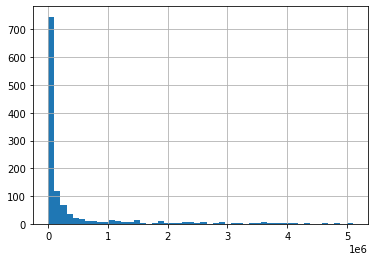

In [267]:
# the distribution is skewed right. We can see that the average time actually covers most of the distribution
df_purch_times[0].hist(bins=50);

## Merge on Users, Sessions, Spendevents

#### Initial Merge

Merge on Users, Sessions, and Spendevents since we can see a lot of features and see how that affects the target audience
IAP and Spendevents is too similar while Spendevents has a lot more data so I chose to use Spendevents


In [208]:
# merge users and sessions so we can track of session numbers
users_sess = pd.merge(users, sessions, on='user_id', how='inner')

# merge users sess and spendevents to get a lot of features from each df
users_sess_spend = pd.merge(users_sess, spendevents, on='user_id', how='inner')
users_sess_spend

,user_id,install_date,lang,country,hw_ver,os_ver,ts_x,date_x,session_num,last_session_termination_type,ts_y,date_y,story,chapter,spendtype,currency,amount
0,0,2019-03-01,en,US,"iPhone4,1",9.1,2019-03-01 12:39:19,2019-03-01,1,NaN,2019-03-01 19:19:52,2019-03-01,story_1,0,earnGemsCounter,gems,-22
1,0,2019-03-01,en,US,"iPhone4,1",9.1,2019-03-01 12:45:47,2019-03-01,2,NaN,2019-03-01 19:19:52,2019-03-01,story_1,0,earnGemsCounter,gems,-22
2,0,2019-03-01,en,US,"iPhone4,1",9.1,2019-03-01 17:00:26,2019-03-01,3,NaN,2019-03-01 19:19:52,2019-03-01,story_1,0,earnGemsCounter,gems,-22
3,0,2019-03-01,en,US,"iPhone4,1",9.1,2019-03-01 17:01:16,2019-03-01,4,NaN,2019-03-01 19:19:52,2019-03-01,story_1,0,earnGemsCounter,gems,-22
4,0,2019-03-01,en,US,"iPhone4,1",9.1,2019-03-01 17:04:46,2019-03-01,5,NaN,2019-03-01 19:19:52,2019-03-01,story_1,0,earnGemsCounter,gems,-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11524835,22573,2019-03-05,en,GB,"iPad2,5",8.3,2019-04-06 23:55:40,2019-04-06,15,NaN,2019-03-11 00:15:35,2019-03-11,story_2,0,earnGemsCounter,gems,-22
11524836,22573,2019-03-05,en,GB,"iPad2,5",8.3,2019-04-07 00:07:09,2019-04-07,16,NaN,2019-03-05 12:56:12,2019-03-05,story_1,0,earnGemsCounter,gems,-22
11524837,22573,2019-03-05,en,GB,"iPad2,5",8.3,2019-04-07 00:07:09,2019-04-07,16,NaN,2019-03-11 00:15:35,2019-03-11,story_2,0,earnGemsCounter,gems,-22
11524838,22575,2019-03-03,en,US,"iPhone7,2",9.2.1,2019-03-03 19:14:35,2019-03-03,1,NaN,2019-03-03 19:18:00,2019-03-03,story_1,0,earnGemsCounter,gems,-22


In [ ]:
# filter on spendtypes that give revenue to Pocket Gems
value_filter = (users_sess_spend['spendtype'] == 'IAP') | (users_sess_spend['spendtype'] == 'valuepack')

# add purchasing column to dataframe
users_sess_spend.loc[value_filter, 'purchaser'] = 1
users_sess_spend.loc[~value_filter, 'purchaser'] = 0

In [273]:
# drop colums due to null value or high cardinality or irrelvancy
drop_cols = ['currency', 'chapter', 'date_y', 'date_x', 'story', 'last_session_termination_type', 'install_date']
users_sess_spend.drop(drop_cols, axis=1, inplace=True)
users_sess_spend

,user_id,lang,country,hw_ver,os_ver,ts_x,session_num,ts_y,spendtype,amount,purchaser
0,0,en,US,"iPhone4,1",9.1,2019-03-01 12:39:19,1,2019-03-01 19:19:52,earnGemsCounter,-22,0.0
1,0,en,US,"iPhone4,1",9.1,2019-03-01 12:45:47,2,2019-03-01 19:19:52,earnGemsCounter,-22,0.0
2,0,en,US,"iPhone4,1",9.1,2019-03-01 17:00:26,3,2019-03-01 19:19:52,earnGemsCounter,-22,0.0
3,0,en,US,"iPhone4,1",9.1,2019-03-01 17:01:16,4,2019-03-01 19:19:52,earnGemsCounter,-22,0.0
4,0,en,US,"iPhone4,1",9.1,2019-03-01 17:04:46,5,2019-03-01 19:19:52,earnGemsCounter,-22,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11524835,22573,en,GB,"iPad2,5",8.3,2019-04-06 23:55:40,15,2019-03-11 00:15:35,earnGemsCounter,-22,0.0
11524836,22573,en,GB,"iPad2,5",8.3,2019-04-07 00:07:09,16,2019-03-05 12:56:12,earnGemsCounter,-22,0.0
11524837,22573,en,GB,"iPad2,5",8.3,2019-04-07 00:07:09,16,2019-03-11 00:15:35,earnGemsCounter,-22,0.0
11524838,22575,en,US,"iPhone7,2",9.2.1,2019-03-03 19:14:35,1,2019-03-03 19:18:00,earnGemsCounter,-22,0.0


#### Valuepack Analysis - Only 33 purchasers of valuepacks

In [277]:
# filter on spendtypes that give revenue to Pocket Gems
IAP_value_filter = (sess_spend['spendtype'] == 'IAP') | (sess_spend['spendtype'] == 'valuepack')
sess_spend_rev = sess_spend[IAP_value_filter]

# filter on spendtypes that give revenue to Pocket Gems
session_num_filter1 = sess_spend_rev['session_num'] == 1
sess_spend_rev = sess_spend_rev[session_num_filter1]

# # reset index for iteration
sess_spend_rev.reset_index(drop=True, inplace=True)

sess_spend_rev

,user_id,ts_x,session_num,ts_y,spendtype,amount
0,19284,2019-03-01 06:48:49,1,2019-03-03 10:53:20,IAP,-73
1,10105,2019-03-03 22:43:38,1,2019-03-03 23:02:17,IAP,-73
2,10105,2019-03-03 22:43:38,1,2019-03-03 23:07:05,IAP,-187
3,10105,2019-03-03 22:43:38,1,2019-03-05 20:16:58,IAP,-787
4,20749,2019-03-04 09:48:14,1,2019-03-04 12:28:37,IAP,-73
...,...,...,...,...,...,...
4902,19783,2019-03-07 09:53:26,1,2019-03-07 10:31:53,IAP,-73
4903,19783,2019-03-07 09:53:26,1,2019-03-08 00:32:01,IAP,-187
4904,13013,2019-03-06 07:45:48,1,2019-03-10 14:56:11,IAP,-73
4905,13013,2019-03-06 07:45:48,1,2019-03-10 14:56:11,IAP,-73


In [279]:
# list of all consumers who's first purchase is a valuepack
valuepack_initiators = []

# iterate over dataframe to find all users who bought the value pack as their first purchase
for i, val in enumerate(sess_spend_rev['spendtype']):
    if (val == 'valuepack') & (sess_spend_rev['session_num'][i] == 1):
        valuepack_initiators.append(sess_spend_rev['user_id'][i])

# remove duplicates
valuepack_initiators = list(dict.fromkeys(valuepack_initiators))

print('# of valuepack initiators: ', valuepack_initiators)

# of valuepack initiators:  [14383, 9487, 5987, 8404, 3260, 9984, 3072, 594, 5782, 7730, 7343, 17105, 4157, 12279, 10710, 21072, 785, 17423, 185, 13523, 16506, 8874, 14509, 8267, 7510, 11877, 4496, 14388, 4025, 8867, 4621, 6780]


In [281]:
# Theres not enough data for valuepack initiators, so we'll check data on users who bought the value pack
print('# of valuepack initiators: ', len(valuepack_initiators))
print('# of valuepack purchases: ', len(sess_spend_rev[users_sess_spend_rev['spendtype'] == 'valuepack']))

# of valuepack initiators:  32
# of valuepack purchases:  30


C:\Users\Eric\anaconda3\envs\unit2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [282]:
# list of all consumers who's first purchase is a valuepack
valuepack_buyers = []

# iterate over dataframe to find all users who bought the value pack as their first purchase
for i, val in enumerate(sess_spend_rev['spendtype']):
    if val == 'valuepack':
        valuepack_buyers.append(sess_spend_rev['user_id'][i])

# remove duplicates
valuepack_buyers = list(dict.fromkeys(valuepack_buyers))

# Theres not enough data for valuepack buyers in general, so we'll make the target anyone who purchased gems
print('valuepack initiators: ', valuepack_buyers)
print('# of valuepack initiators: ', len(valuepack_buyers))

valuepack initiators:  [14383, 9487, 5987, 8404, 3260, 9984, 3072, 594, 5782, 7730, 7343, 17105, 4157, 12279, 10710, 21072, 785, 17423, 185, 13523, 16506, 8874, 14509, 8267, 7510, 11877, 4496, 14388, 4025, 8867, 4621, 6780]
# of valuepack initiators:  32


#### Create final dataframe for analyis

In [284]:
# filter on spendtypes that give revenue to Pocket Gems
session_num_filter = users_sess_spend['session_num'] == 1
users_sess_spend_final = users_sess_spend[session_num_filter]

# # reset index for iteration
users_sess_spend_final.reset_index(drop=True, inplace=True)

users_sess_spend_final

,user_id,lang,country,hw_ver,os_ver,ts_x,session_num,ts_y,spendtype,amount,purchaser
0,0,en,US,"iPhone4,1",9.1,2019-03-01 12:39:19,1,2019-03-01 19:19:52,earnGemsCounter,-22,0.0
1,1,en,IN,"iPod5,1",8.1.2,2019-03-01 20:02:56,1,2019-03-01 20:07:58,earnGemsCounter,-22,0.0
2,1,en,IN,"iPod5,1",8.1.2,2019-03-01 20:02:56,1,2019-03-02 21:12:03,earnGemsCounter,-22,0.0
3,2,en,US,"iPod7,1",8.4.1,2019-03-06 10:02:20,1,2019-03-06 10:09:07,earnGemsCounter,-22,0.0
4,2,en,US,"iPod7,1",8.4.1,2019-03-06 10:02:20,1,2019-03-07 11:31:43,earnGemsCounter,-22,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106850,22571,en,US,"iPhone4,1",8.3,2019-03-01 17:01:32,1,2019-03-11 19:27:20,earnGemsCounter,-22,0.0
106851,22572,fr,FR,"iPhone6,2",9.2.1,2019-03-06 05:10:21,1,2019-03-06 05:17:06,earnGemsCounter,-22,0.0
106852,22573,en,GB,"iPad2,5",8.3,2019-03-05 12:51:40,1,2019-03-05 12:56:12,earnGemsCounter,-22,0.0
106853,22573,en,GB,"iPad2,5",8.3,2019-03-05 12:51:40,1,2019-03-11 00:15:35,earnGemsCounter,-22,0.0


In [288]:
# container to keep track of duplicate_id_arr
user_id_arr = []

# iterate over user_id to remove duplicates
for i, value in enumerate(users_sess_spend_final['user_id']):
    if value not in user_id_arr:
        user_id_arr.append(value)
    else:
        users_sess_spend_final.drop([i], inplace=True)

C:\Users\Eric\anaconda3\envs\unit2\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# check to see if duplicate user_id's got removed
users_sess_spend_final

In [291]:
# check to see if duplicate user_id's got removed
users_sess_spend_final['user_id'].value_counts().value_counts()

1    17855
Name: user_id, dtype: int64

In [ ]:
# convert ts to dt
users_sess_spend_final['ts_x'] = pd.to_datetime(users_sess_spend_final['ts_x'])
users_sess_spend_final['ts_y'] = pd.to_datetime(users_sess_spend_final['ts_y'])

In [294]:
# reset index for iteration
users_sess_spend_final.reset_index(drop=True, inplace=True)
users_sess_spend_final

,user_id,lang,country,hw_ver,os_ver,ts_x,session_num,ts_y,spendtype,amount,purchaser
0,0,en,US,"iPhone4,1",9.1,2019-03-01 12:39:19,1,2019-03-01 19:19:52,earnGemsCounter,-22,0.0
1,1,en,IN,"iPod5,1",8.1.2,2019-03-01 20:02:56,1,2019-03-01 20:07:58,earnGemsCounter,-22,0.0
2,2,en,US,"iPod7,1",8.4.1,2019-03-06 10:02:20,1,2019-03-06 10:09:07,earnGemsCounter,-22,0.0
3,3,nb,NO,"iPhone8,1",9.2.1,2019-03-03 11:08:57,1,2019-03-03 13:10:36,earnGemsCounter,-22,0.0
4,4,en,GB,"iPhone5,4",9.2.1,2019-03-03 08:49:37,1,2019-03-03 08:52:39,earnGemsCounter,-22,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17850,22570,da,DK,"iPhone7,2",9.2.1,2019-03-05 10:30:24,1,2019-03-05 10:33:10,earnGemsCounter,-22,0.0
17851,22571,en,US,"iPhone4,1",8.3,2019-03-01 17:01:32,1,2019-03-11 19:27:20,earnGemsCounter,-22,0.0
17852,22572,fr,FR,"iPhone6,2",9.2.1,2019-03-06 05:10:21,1,2019-03-06 05:17:06,earnGemsCounter,-22,0.0
17853,22573,en,GB,"iPad2,5",8.3,2019-03-05 12:51:40,1,2019-03-05 12:56:12,earnGemsCounter,-22,0.0


In [310]:
# Create a list to find purchase time in days
purch_time_days = []

# iterate over df to find purchase time in days and append to list
for i, val in enumerate(users_sess_spend_final['ts_y']):
    if users_sess_spend_final['purchaser'][i] == 0.0:
        purch_time_days.append(None)
    else:
        purch_time_sec = (val - users_sess_spend_final['ts_x'][i]).total_seconds()
        purch_time_days.append(purch_time_sec/60/60/24)
    
# add list as column to final df
users_sess_spend_final['purch_time_days'] = purch_time_days

C:\Users\Eric\anaconda3\envs\unit2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [311]:
users_sess_spend_final

,user_id,lang,country,hw_ver,os_ver,ts_x,session_num,ts_y,spendtype,amount,purchaser,purch_time_days
0,0,en,US,"iPhone4,1",9.1,2019-03-01 12:39:19,1,2019-03-01 19:19:52,earnGemsCounter,-22,0.0,NaN
1,1,en,IN,"iPod5,1",8.1.2,2019-03-01 20:02:56,1,2019-03-01 20:07:58,earnGemsCounter,-22,0.0,NaN
2,2,en,US,"iPod7,1",8.4.1,2019-03-06 10:02:20,1,2019-03-06 10:09:07,earnGemsCounter,-22,0.0,NaN
3,3,nb,NO,"iPhone8,1",9.2.1,2019-03-03 11:08:57,1,2019-03-03 13:10:36,earnGemsCounter,-22,0.0,NaN
4,4,en,GB,"iPhone5,4",9.2.1,2019-03-03 08:49:37,1,2019-03-03 08:52:39,earnGemsCounter,-22,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17850,22570,da,DK,"iPhone7,2",9.2.1,2019-03-05 10:30:24,1,2019-03-05 10:33:10,earnGemsCounter,-22,0.0,NaN
17851,22571,en,US,"iPhone4,1",8.3,2019-03-01 17:01:32,1,2019-03-11 19:27:20,earnGemsCounter,-22,0.0,NaN
17852,22572,fr,FR,"iPhone6,2",9.2.1,2019-03-06 05:10:21,1,2019-03-06 05:17:06,earnGemsCounter,-22,0.0,NaN
17853,22573,en,GB,"iPad2,5",8.3,2019-03-05 12:51:40,1,2019-03-05 12:56:12,earnGemsCounter,-22,0.0,NaN


In [313]:
# We only have 39 purchasers
len(users_sess_spend_final[users_sess_spend_final['purchaser']>0])

39

In [ ]:
# Convert purchase_times into a float form so we can go deeper in analysis
purchase_times_int = [t.total_seconds() for t in purchase_times]

# confirmed answers is similar to previous method. However the 1st method is more accurate
print('average purchase time in secs: ', np.average(purchase_times_int))
print('average purchase time in days: ', np.average(purchase_times_int)/60/60/24)